In [1]:
import math
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

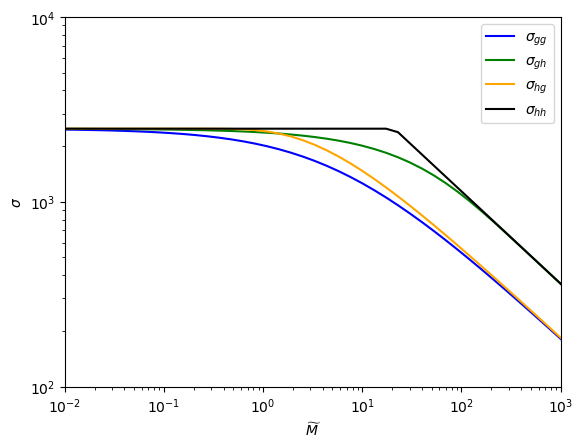

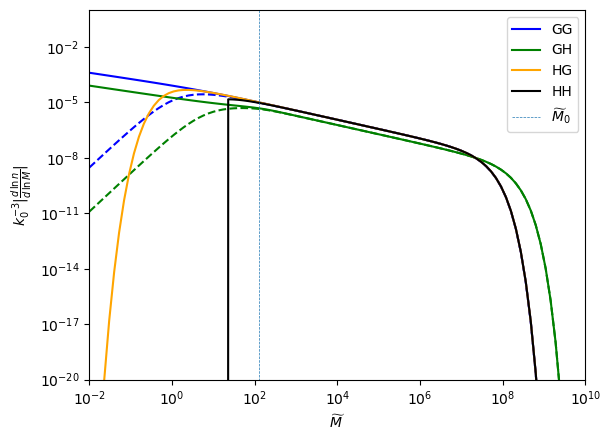

In [2]:
k_0 = 1
rho_a0 = 1

PI = math.pi
D_z_eq = 3.6e-4
del_c = 1.686

M_tilda_0 = (4 * PI**4 / 3)
M_cut = M_tilda_0
M_0 = M_tilda_0 * (rho_a0 / k_0**3)
P_0_g = math.sqrt(128 * PI**3) / (5 * k_0**3)
P_0_h = 24 * PI**2 / (5 * k_0**3)

M_half_h = math.pow(2*PI, 3/2)
M_half_g = 0.2 * M_half_h

def R(M: np.ndarray) -> np.ndarray:
    return (M)**(1/3) / math.sqrt(2 * PI)

def M(R: np.ndarray) -> np.ndarray:
    return PI**(3/2) * R**3

def sigma_gg(R: np.ndarray) -> np.ndarray:
    R = R * k_0
    c1 = P_0_g / (2 * PI**2 * D_z_eq**2)
    return np.sqrt(c1 * math.sqrt(PI/2) * (1 + 2*(R**2))**(-3/2))

def dn_dlnM_gg(R: np.ndarray, M: np.ndarray) -> np.ndarray:
    R = R * k_0
    c1 = P_0_g / (2 * PI**2 * D_z_eq**2)
    sigma_gg =  np.sqrt(c1 * math.sqrt(PI/2) * (1 + 2*(R**2))**(-3/2))
    
    dlnsigma_dlnM_gg =  R**2 / (1 + 2*(R**2))

    tmp = del_c / sigma_gg
    return math.sqrt(2/PI) * dlnsigma_dlnM_gg * tmp * np.exp(-0.5 * tmp**2) / M

def sigma_gh(R: np.ndarray) -> np.ndarray:
    R = R * k_0
    c2 = P_0_h / (2 * PI**2 * D_z_eq**2)
    return np.sqrt(c2 * (-2*R*np.exp(-R**2) + math.sqrt(PI) * sc.erf(R)) / (4 * R**3))

def dn_dlnM_gh(R: np.ndarray, M: np.ndarray) -> np.ndarray:
    R = R * k_0
    c2 = P_0_h / (2 * PI**2 * D_z_eq**2)
    sigma2_gh = (-2*R*np.exp(-R**2) + math.sqrt(PI) * sc.erf(R)) / (4 * R**3)
    dlnsigma_dlnM_gh = np.abs(((6*R + 4*R**3) * np.exp(-R**2) - 3*math.sqrt(PI)*sc.erf(R))/(-2*R*np.exp(-R**2) + math.sqrt(PI) * sc.erf(R))) / 6

    tmp = del_c / np.sqrt(c2 * sigma2_gh)
    return math.sqrt(2/PI) * rho_a0 * dlnsigma_dlnM_gh * tmp * np.exp(-0.5 * tmp**2) / M

def sigma_hg(R: np.ndarray) -> np.ndarray:
    R = R * k_0
    c1 = P_0_g / (2 * PI**2 * D_z_eq**2)
    return np.sqrt(c1 * (math.sqrt(PI/2) * sc.erf(1/(math.sqrt(2) * R)) - (1/R) * np.exp(-0.5*(R**(-2)))))

def sigma_hh(R: np.ndarray) -> np.ndarray:
    R = R * k_0
    c2 = P_0_h / (2 * PI**2 * D_z_eq**2)
    sigma2 = (c2/3) / (np.maximum(R,1)**3)
    return np.sqrt(sigma2)

def dn_dlnM_hg(R: np.ndarray, M: np.ndarray) -> np.ndarray:
    R = R * k_0
    c1 = P_0_g / (2 * PI**2 * D_z_eq**2)
    sigma2 = (math.sqrt(PI/2) * sc.erf(1/(math.sqrt(2) * R)) - (1/R) * np.exp(-0.5*(R**(-2))))
    dsigma2 = (- 1/(R**4)) * np.exp(-1/(2* R**2))
    dlnsigma_dlnM_hg = np.abs(dsigma2 * R / (6 * sigma2))

    tmp = del_c / np.sqrt(c1 * sigma2)
    return math.sqrt(2/PI) * rho_a0 * dlnsigma_dlnM_hg * tmp * np.exp(-0.5 * tmp**2) / M

def dn_dlnM_hh(R: np.ndarray, M: np.ndarray) -> np.ndarray:
    R = R * k_0
    c2 = P_0_g / (2 * PI**2 * D_z_eq**2)
    sigma2 = (c2/3) / (np.maximum(R,1)**3)
    dsigma2 = np.zeros_like(sigma2)
    dsigma2[R >= 1] = c2 / (R[R >= 1])**4
    dlnsigma_dlnM_hg = np.abs(dsigma2 * R / (6 * sigma2))

    tmp = del_c / np.sqrt(sigma2)
    fac = (1 + (2.4 * M/M_half_h)**(-1.1))**(2.2)
    return math.sqrt(2/PI) * rho_a0 * dlnsigma_dlnM_hg * tmp * np.exp(-0.5 * tmp**2) / (M * fac)

M_tilda = np.linspace(-2, 10, 101)
M_tilda = 10**M_tilda
mass = M_tilda * (rho_a0 / k_0**3)
rad_g = R(mass)
rad_h = R(mass/(4/3))
fac_halfmode = (1 + (2.4 * mass/M_half_g)**(-1.1))**(-2.2)
fac_halfmode1 = (1 + (2.4 * mass/M_half_h)**(-1.1))**(-2.2)
dn_dlnm_gg = dn_dlnM_gg(rad_g, mass)
dn_dlnM_gg_half = dn_dlnm_gg * fac_halfmode
dn_dlnm_gh = dn_dlnM_gh(rad_g, mass)
dn_dlnM_gh_half = dn_dlnm_gh * fac_halfmode1
dn_dlnm_hg = dn_dlnM_hg(rad_h, mass)
dn_dlnm_hh = dn_dlnM_hh(rad_h, mass)

plt.loglog(M_tilda, sigma_gg(rad_g), label = "$\sigma_{gg}$", c="blue")
plt.loglog(M_tilda, sigma_gh(rad_g), label = "$\sigma_{gh}$", c="green")
plt.loglog(M_tilda, sigma_hg(rad_h), label = "$\sigma_{hg}$", c="orange")
plt.loglog(M_tilda, sigma_hh(rad_h), label = "$\sigma_{hh}$", c="black")
plt.xlim((1e-2, 1e3))
plt.ylim((1e2, 1e4))
plt.xlabel("$\widetilde{M}$")
plt.ylabel("$\sigma$")
plt.legend()
plt.savefig("sigma.png")
plt.show()

plt.loglog(M_tilda, dn_dlnm_gg, label = "GG", c="blue")
plt.loglog(M_tilda, dn_dlnM_gg_half, linestyle='--', c="blue")
plt.loglog(M_tilda, dn_dlnm_gh, label = "GH", c="green")
plt.loglog(M_tilda, dn_dlnM_gh_half, linestyle='--', c="green")
plt.loglog(M_tilda, dn_dlnm_hg, label = "HG", c="orange")
plt.loglog(M_tilda, dn_dlnm_hh, label = "HH", c="black")
plt.plot([M_tilda_0, M_tilda_0], [1e3, 1e-20], linewidth=0.5, linestyle='--', label = "$\widetilde{M}_0$")
plt.xlim((1e-2, 1e10))
plt.ylim((1e-20, 1))
plt.xlabel("$\widetilde{M}$")
plt.ylabel("$k_0^{-3}|\\frac{d\,\ln{n}}{d\,\ln{M}}|$")
plt.legend()
plt.savefig("dlnn_dlnM.png")
plt.show()